### Optional step: Suppress warnings

In [76]:
# Supress Warnings
# this ignores the warnings that are displayed

import warnings
warnings.filterwarnings('ignore')

### Step 1: Import necessary libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS, add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

### Step 2: Read and understand the data

In [78]:
# Load the dataset
df = pd.read_csv('day.csv')

In [79]:
df.shape # there are 730 rows and 16 columns

(730, 16)

In [80]:
df.head() # inspecting only the first 5 rows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [82]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 3: Check for missing, null and duplicate values

In [83]:
# Check for missing values
print("****Missing values check****")
print(df.isnull().sum())

# Check for null values
print("****Null values check****")
print(df.isna().sum())

# Check for duplicates
print("****Duplicate values check****")
print(df.duplicated().sum())

****Missing values check****
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
****Null values check****
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
****Duplicate values check****
0


##### Inference: There are no missing null or duplicate values

### Step 4: Convert variables to categorical

In [84]:
# Convert 'weathersit' variable to categorical
weather_mapping = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}
df['weathersit'] = df['weathersit'].map(weather_mapping)

season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
df['season'] = df['season'].map(season_mapping)

year_mapping = {
    0: '2018',
    1: '2019'
}
df['yr'] = df['yr'].map(year_mapping)

print(df.head())

   instant      dteday  season    yr  mnth  holiday  weekday  workingday   
0        1  01-01-2018  spring  2018     1        0        6           0  \
1        2  02-01-2018  spring  2018     1        0        0           0   
2        3  03-01-2018  spring  2018     1        0        1           1   
3        4  04-01-2018  spring  2018     1        0        2           1   
4        5  05-01-2018  spring  2018     1        0        3           1   

                                          weathersit       temp     atemp   
0  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  14.110847  18.18125  \
1  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  14.902598  17.68695   
2    Clear, Few clouds, Partly cloudy, Partly cloudy   8.050924   9.47025   
3    Clear, Few clouds, Partly cloudy, Partly cloudy   8.200000  10.60610   
4    Clear, Few clouds, Partly cloudy, Partly cloudy   9.305237  11.46350   

       hum  windspeed  casual  registered   cnt  
0  80.5833  10.749882     331 

### Step 5: remove unwanted and redundant columns

In [85]:
# Remove redundant and unwanted columns
unwanted_columns = ['instant', 'dteday', 'casual', 'registered']
df = df.drop(unwanted_columns, axis=1)

print(df.head())

   season    yr  mnth  holiday  weekday  workingday   
0  spring  2018     1        0        6           0  \
1  spring  2018     1        0        0           0   
2  spring  2018     1        0        1           1   
3  spring  2018     1        0        2           1   
4  spring  2018     1        0        3           1   

                                          weathersit       temp     atemp   
0  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  14.110847  18.18125  \
1  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  14.902598  17.68695   
2    Clear, Few clouds, Partly cloudy, Partly cloudy   8.050924   9.47025   
3    Clear, Few clouds, Partly cloudy, Partly cloudy   8.200000  10.60610   
4    Clear, Few clouds, Partly cloudy, Partly cloudy   9.305237  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600  


### Step 6: Visualize numeric and categorical variables

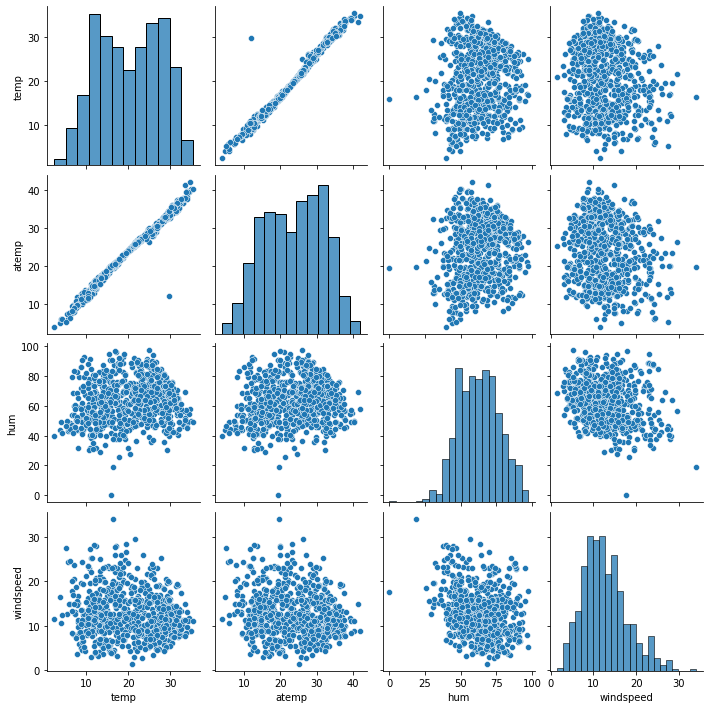

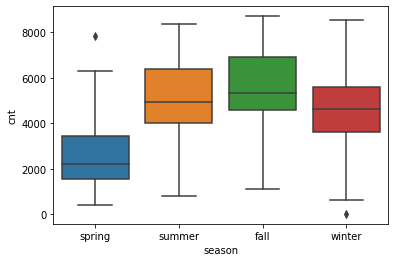

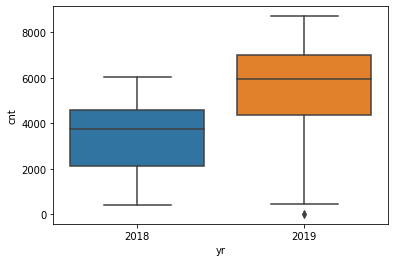

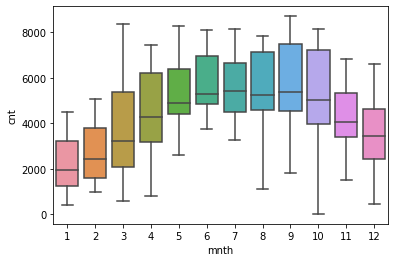

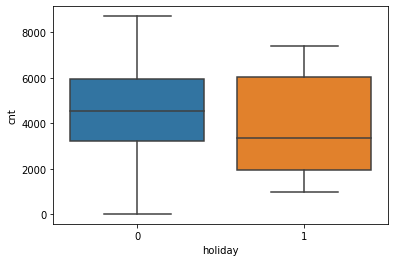

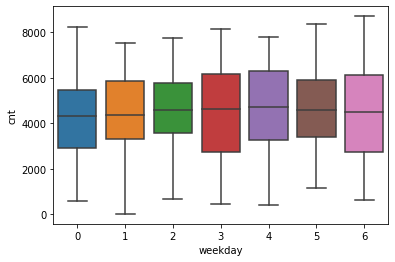

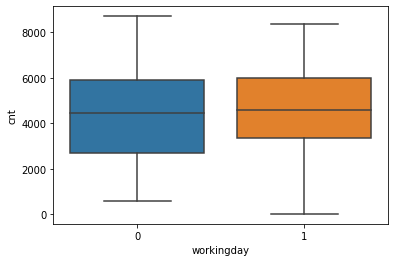

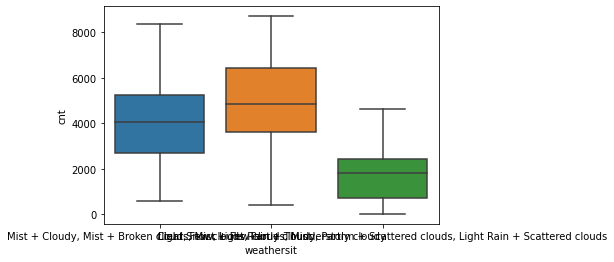

In [86]:
numeric_variables = ['temp', 'atemp', 'hum', 'windspeed']
categorical_variables = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Visualize numeric variables
sns.pairplot(df[numeric_variables])
plt.show()

# Visualize categorical variables
for variable in categorical_variables:
    sns.boxplot(x=variable, y='cnt', data=df)
    plt.show()


### Step 7: Create dummy variables

In [87]:
df = pd.get_dummies(df, drop_first=True)

### Step 8: Split into train and test

In [88]:
# Split into train and test sets
X = df.drop('cnt', axis=1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 9: Rescale features

In [89]:
# Rescale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 10: Plot a heatmap to check correlation

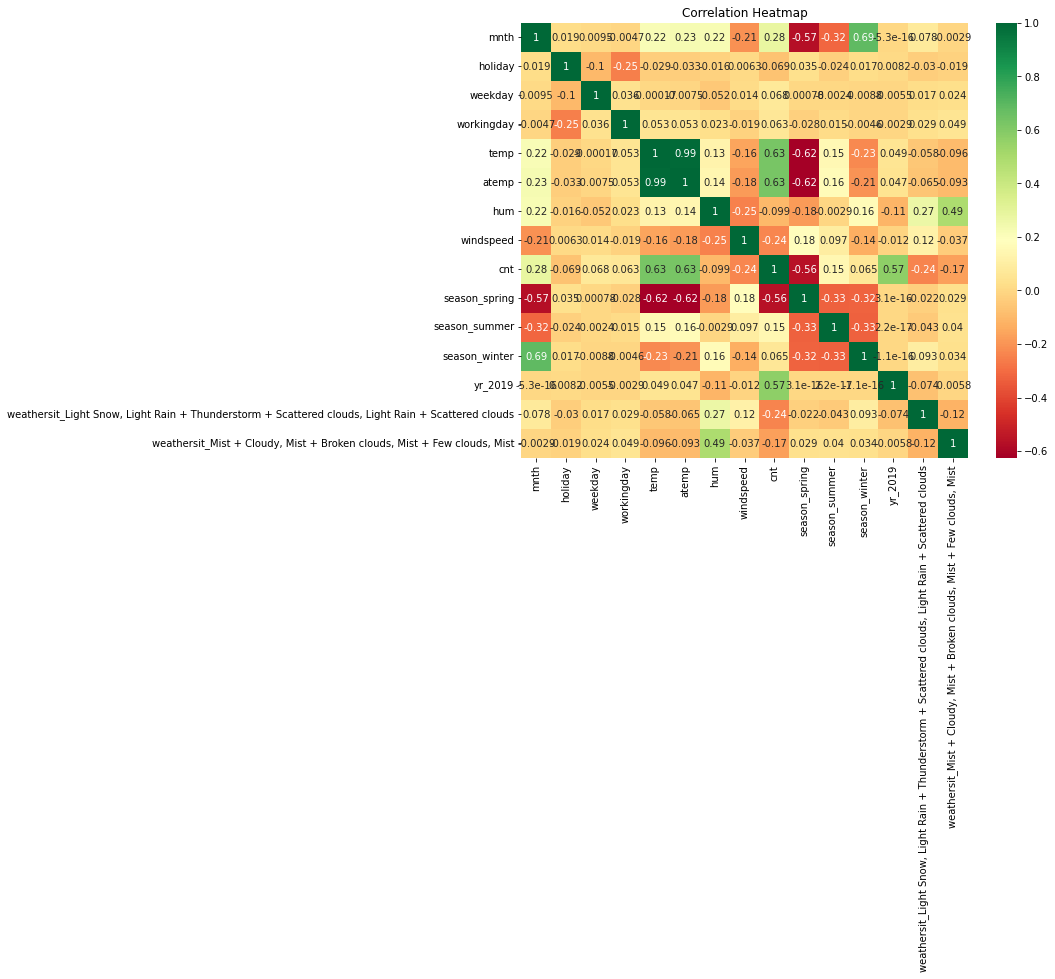

In [90]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()


### Step 11: Build a linear model

In [91]:
X_train_scaled = add_constant(X_train_scaled)
model = OLS(y_train, X_train_scaled)
results = model.fit()

# Step 10: Check the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     187.0
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.19e-202
Time:                        22:59:06   Log-Likelihood:                -4750.7
No. Observations:                 584   AIC:                             9531.
Df Residuals:                     569   BIC:                             9597.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4546.3613     34.601    131.393      0.0

### Step 12: Check VIF

In [92]:
# Convert input data to suitable numeric type
X_numeric = X.astype(float)

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X_numeric.columns
vif["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

# Display the VIF values
print(vif)

                                              Feature         VIF
0                                                mnth   13.937693
1                                             holiday    1.115239
2                                             weekday    3.196093
3                                          workingday    3.344655
4                                                temp  588.649833
5                                               atemp  619.713724
6                                                 hum   31.063370
7                                           windspeed    7.077890
8                                       season_spring    4.399797
9                                       season_summer    2.680504
10                                      season_winter    4.288072
11                                            yr_2019    2.038819
12  weathersit_Light Snow, Light Rain + Thundersto...    1.297836
13  weathersit_Mist + Cloudy, Mist + Broken clouds...    2.314129


### Step 13: Residual analysis on train data

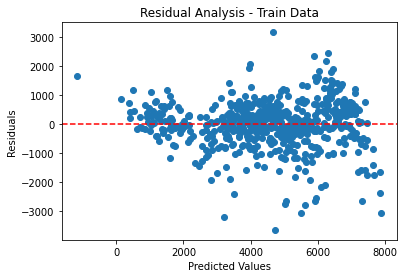

In [93]:
y_pred_train = results.predict(X_train_scaled)
residuals_train = y_train - y_pred_train

plt.scatter(y_pred_train, residuals_train)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis - Train Data')
plt.show()

### Step 14: Make predictions using the final model

In [94]:
X_test_scaled = add_constant(X_test_scaled)
y_pred_test = results.predict(X_test_scaled)

### Step 15: Model evaluation

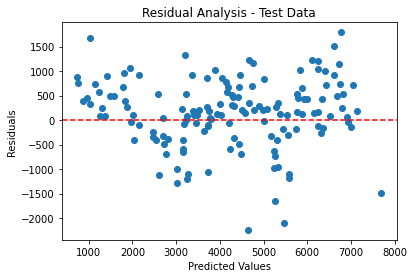

In [95]:
residuals_test = y_test - y_pred_test

plt.scatter(y_pred_test, residuals_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis - Test Data')
plt.show()

### Step 16: Calculate R-squared score on the test set

In [96]:
r2_score_test = r2_score(y_test, y_pred_test)
print(f"R-squared score on test set: {r2_score_test}")

R-squared score on test set: 0.8520828533826301
